In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy  as np
#import lightgbm as lgb

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
orial_data = pd.read_csv('data/train.csv',parse_dates=[2])
orial_data.head()
orial_data.shape[0]

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1017209

In [3]:
#数据拷贝一份进行处理，避免 对原始数据的改变
data_data = orial_data.copy()
#data_data.describe()
data_data.shape[0]

1017209

In [4]:
# 加载store 数据
store = pd.read_csv('data/store.csv')
data_store = store.copy()
#异常值处理
#'CompetitionOpenSinceYear': 0,
fill_values = { 'CompetitionOpenSinceYear': 0,'CompetitionDistance': 1, 'CompetitionOpenSinceMonth': 0, 'Promo2SinceWeek':0,'Promo2SinceYear':0,'PromoInterval':'None' }
data_store.fillna(value=fill_values,inplace = True)
store_drop_columns = ['PromoInterval']
data_store.drop(store_drop_columns,axis=1,inplace=True)
data_store.head(20)



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0
5,6,a,a,310.0,12.0,2013.0,0,0.0,0.0
6,7,a,c,24000.0,4.0,2013.0,0,0.0,0.0
7,8,a,a,7520.0,10.0,2014.0,0,0.0,0.0
8,9,a,c,2030.0,8.0,2000.0,0,0.0,0.0
9,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0


In [5]:
##'CompetitionOpenSinceYear': 0  换成 Promo2SinceYear

#data_store['CompetitionOpenSinceYear'].fillna(data_store['Promo2SinceYear'],inplace = True)
#data_store.head(20)

In [6]:
#构建competitionOpen 最近竞争对手开业多少个月

In [7]:
#加载test 数据
test = pd.read_csv('data/test.csv')
data_test = test.copy()
data_test.fillna(value={'Open':1},inplace=True)
data_test.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [8]:
#将字符的属性转换成数字
replace_data = {'a':1,'b':2,'c':3,'d':4}
print(type(data_store))
print(type(data_store['Assortment']))
print(type(data_store.Assortment))
data_store['Assortment'].replace(replace_data,inplace=True)
data_store['StoreType'].replace(replace_data,inplace=True)

data_store.head(10)

data_data['StateHoliday'].replace(replace_data,inplace=True)
data_data['StateHoliday'] = data_data['StateHoliday'].apply(pd.to_numeric)
data_data.shape[0]

data_test['StateHoliday'].replace(replace_data,inplace=True)
data_test['StateHoliday'] = data_test['StateHoliday'].apply(pd.to_numeric)
print(data_test['StateHoliday'].unique())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[0 1]


In [9]:
# 进行归一化 对CompetitionDistance

scaler = MinMaxScaler()
x = data_store['CompetitionDistance'].values.reshape(-1,1)
data_store['CompetitionDistance'] = scaler.fit_transform(x)
data_store.head(5)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,3,1,0.016728,9.0,2008.0,0,0.0,0.0
1,2,1,1,0.007501,11.0,2007.0,1,13.0,2010.0
2,3,1,1,0.186253,12.0,2006.0,1,14.0,2011.0
3,4,3,3,0.008160,9.0,2009.0,0,0.0,0.0
4,5,1,1,0.394271,4.0,2015.0,0,0.0,0.0


In [10]:
#pd.get_dummies(data_store)
data_test.head(1)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0


In [11]:
data_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [12]:
# 提取出月份、年份,数据增加年份和月份的列
import time, datetime
def conver_date(data):
    print(data.head(5))
    data_month = pd.to_datetime(data['Date'],format='%Y-%m-%d %H:%M:%S')
    data_date = pd.to_datetime(data['Date'],format='%Y/%m/%d')
    data['year'] = data_date.dt.year
    data['month'] = data_date.dt.month
    data['day'] = data_date.dt.day
    data['WweekOfYear']= data_date.dt.weekofyear
    data.drop('Date',axis=1,inplace=True)
    return data
data_data = conver_date(data_data)
data_test = conver_date(data_test)
data_test.head(5)
    
#print(time.strftime('%Y-%m-%d %H:%M:%S'))
#data_month = pd.to_datetime(data_data['Date'],format='%Y-%m-%d %H:%M:%S')

#record['ym']=record['HAPPEN_TIME']
#data_year =data_data['Date'].apply(lambda x:x.split('-')[0])
#data_date = pd.to_datetime(data_data['Date'],format='%Y/%m/%d')
#data_data['year'] = data_date.dt.year
#data_data['month'] = data_date.dt.month
#data_data['day'] = data_date.dt.day
#data_data.drop('Date',axis=1,inplace=True)


#month2str = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
#data_data['month2str'] = data_data.month.map(month2str)
#data_data.head(25)
#data_data.shape[0]

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo  StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1             0              0
1   2      3          4  2015-09-17   1.0      1             0              0
2   3      7          4  2015-09-17   1.0      1             0              0
3   4      8          4  2015-09-17   1.0      1             0              0
4   5      9         

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear
0,1,1,4,1.0,1,0,0,2015,9,17,38
1,2,3,4,1.0,1,0,0,2015,9,17,38
2,3,7,4,1.0,1,0,0,2015,9,17,38
3,4,8,4,1.0,1,0,0,2015,9,17,38
4,5,9,4,1.0,1,0,0,2015,9,17,38


In [13]:
data_data.shape[0]
#选取open = 1 的数据
data_data = data_data.loc[(data_data['Open'] == 1)]
print(data_data.shape[0])
data_data  = data_data.loc[(data_data['Sales'] > 0)]
print(data_data.shape[0])


844392
844338


In [14]:
#选取某一个店的ID,获取其销售记录 并显示其每个月的销售情况
def get_month_sales_by_id(id):
    store_data = data_data.loc[(data_data['Store'] == 1)]
    store_data_2013 = store_data.loc[store_data['year'] == 2013]
    store_data_2014 = store_data.loc[store_data['year'] == 2014]
    store_data_2015 = store_data.loc[store_data['year'] == 2015]
    
    #计算每年每个月的销售情况
    store_data_2013_month = store_data_2013.groupby(by=['month'])['Sales'].sum()
    store_data_2014_month = store_data_2014.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month = store_data_2015.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month.rename(columns={"month":"sum_of_value"},inplace=True)
    
    #print(store_data_2015_month.to_frame().columns())
    #print(store_data_2015_month[1])
    #print(store_data_2015_month.head(20))
    store_data_month={}
    store_data_month['2013'] = store_data_2013_month
    store_data_month['2014'] = store_data_2014_month
    store_data_month['2015'] = store_data_2015_month
    
    return store_data_month
a=get_month_sales_by_id(5)
print("2014 1",a['2014'][1])

2014 1 118814


In [15]:
month_info = get_month_sales_by_id(5)
month_info['2015'][8] = month_info['2015'][9] = month_info['2015'][10] =  month_info['2015'][11] = month_info['2015'][12] = 0
for i in month_info:
    print(i)
    print(month_info[i])

2013
month
1     128431
2     125271
3     145169
4     118009
5     118225
6     113411
7     128032
8     118320
9     108867
10    114641
11    127596
12    145168
Name: Sales, dtype: int64
2014
month
1     118814
2     110434
3     116467
4     115292
5     117715
6     107905
7     122604
8     111004
9     106398
10    114897
11    130852
12    161026
Name: Sales, dtype: int64
2015
month
1     119602
2     106635
3     118917
4     110655
5     105220
6     110011
7     121266
8          0
9          0
10         0
11         0
12         0
dtype: int64


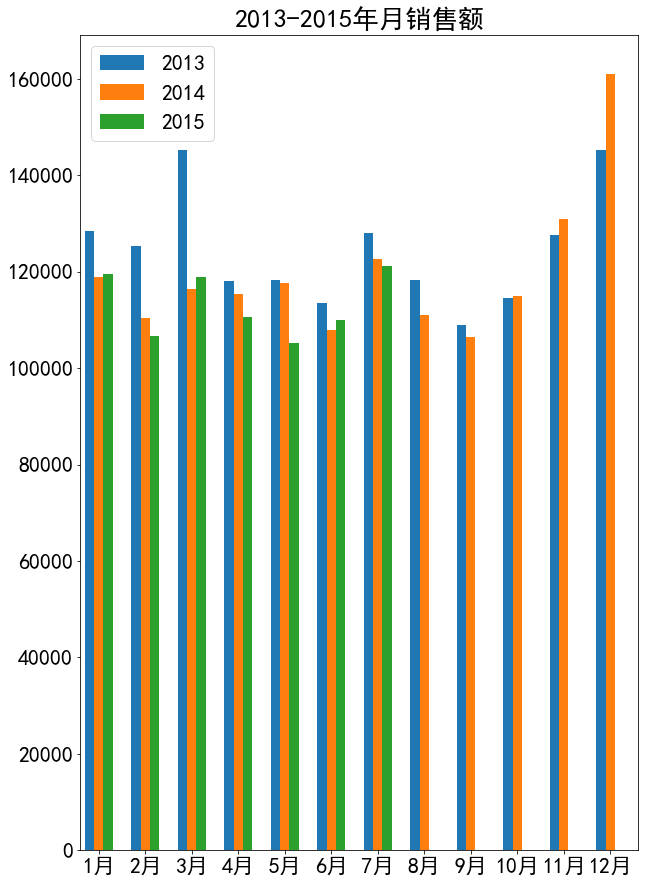

In [16]:


#解决中文乱码的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

#X=[0,1,2,3,4,5,6,7,8,9,10,11]
x_labels = ['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
X = np.arange(12)
bar_width = 0.2
Y=[222,42,455,664,454,334,222,42,455,664,454,334]

fig = plt.figure(figsize=(10,15))
ax = plt.subplot()
bars = []
years = []
ij = 0
for i in month_info:
    ij = ij +1
    bar_i = ax.bar(X+bar_width*ij,month_info[i],bar_width)
    bars.append(bar_i)
    years.append(i)

#bar_1 = ax.bar(X+bar_width,month_info['2013'],bar_width)
#bar_2 = ax.bar(X+bar_width*2,month_info['2014'],bar_width)
#bar_3 = ax.bar(X+bar_width*3,month_info['2015'],bar_width)
ax.set_xticklabels(x_labels)
plt.xticks(X+bar_width*2)
plt.xlim(0,len(x_labels))
plt.title('2013-2015年月销售额')
handles, labels = ax.get_legend_handles_labels()

plt.legend(bars, years,loc = 'best')
#plt.set_xticks(x_labels)
#plt.savefig('./year_month.jpg')
plt.show()


In [17]:
data_data = data_data.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_data.shape[0])
data_data.head(10)
#

844338


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,0,1,2015,7,31,31,3,1,0.016728,9.0,2008.0,0,0.0,0.0
1,2,5,6064,625,1,1,0,1,2015,7,31,31,1,1,0.007501,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,0,1,2015,7,31,31,1,1,0.186253,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,3,3,0.008160,9.0,2009.0,0,0.0,0.0
4,5,5,4822,559,1,1,0,1,2015,7,31,31,1,1,0.394271,4.0,2015.0,0,0.0,0.0
5,6,5,5651,589,1,1,0,1,2015,7,31,31,1,1,0.004073,12.0,2013.0,0,0.0,0.0
6,7,5,15344,1414,1,1,0,1,2015,7,31,31,1,3,0.316363,4.0,2013.0,0,0.0,0.0
7,8,5,8492,833,1,1,0,1,2015,7,31,31,1,1,0.099118,10.0,2014.0,0,0.0,0.0
8,9,5,8565,687,1,1,0,1,2015,7,31,31,1,3,0.026747,8.0,2000.0,0,0.0,0.0
9,10,5,7185,681,1,1,0,1,2015,7,31,31,1,1,0.041643,9.0,2009.0,0,0.0,0.0


In [18]:
#构建competitionOpen 最近竞争对手开业多少个月
data_data['CompetitionOpen'] = 12 *(data_data['year']-data_data['CompetitionOpenSinceYear'])+(data_data['month']-data_data['CompetitionOpenSinceMonth'])
data_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,...,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,31,3,1,0.016728,9.0,2008.0,0,0.0,0.0,82.0
1,2,5,6064,625,1,1,0,1,2015,7,...,31,1,1,0.007501,11.0,2007.0,1,13.0,2010.0,92.0
2,3,5,8314,821,1,1,0,1,2015,7,...,31,1,1,0.186253,12.0,2006.0,1,14.0,2011.0,103.0
3,4,5,13995,1498,1,1,0,1,2015,7,...,31,3,3,0.008160,9.0,2009.0,0,0.0,0.0,70.0
4,5,5,4822,559,1,1,0,1,2015,7,...,31,1,1,0.394271,4.0,2015.0,0,0.0,0.0,3.0


In [19]:
#构建特征PromoOpen 开始促销多少个月
data_data['PromoOpen'] = 12*(data_data['year']-data_data['Promo2SinceYear'])+(data_data['WweekOfYear']-data_data['Promo2SinceWeek'])/4.0
data_data.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,3,1,0.016728,9.0,2008.0,0,0.0,0.0,82.0,24187.75
1,2,5,6064,625,1,1,0,1,2015,7,...,1,1,0.007501,11.0,2007.0,1,13.0,2010.0,92.0,64.50
2,3,5,8314,821,1,1,0,1,2015,7,...,1,1,0.186253,12.0,2006.0,1,14.0,2011.0,103.0,52.25
3,4,5,13995,1498,1,1,0,1,2015,7,...,3,3,0.008160,9.0,2009.0,0,0.0,0.0,70.0,24187.75
4,5,5,4822,559,1,1,0,1,2015,7,...,1,1,0.394271,4.0,2015.0,0,0.0,0.0,3.0,24187.75


In [20]:
#test 数据获取open=1 的数据
print(data_test.shape[0])
data_test_noOpen = data_test.loc[(data_test['Open'] == 0)]
data_test_noPenIds = data_test_noOpen['Id']

data_test = data_test.loc[(data_test['Open'] == 1)]
data_test_ids = data_test['Id']
data_test.drop(['Id'],axis=1,inplace = True)
print(data_test.shape[0])
print(data_test_noOpen.shape[0])
print(data_test_noOpen)
#data=data_test[~((data_test['Open']==0)|(data_test['Open']==1))]
#print(data)

41088
35104
5984
          Id  Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
543      544    703          4   0.0      1             0              0   
676      677    879          4   0.0      1             0              0   
840      841   1097          4   0.0      1             0              0   
1399    1400    703          3   0.0      1             0              0   
1532    1533    879          3   0.0      1             0              0   
1696    1697   1097          3   0.0      1             0              0   
2255    2256    703          2   0.0      1             0              0   
2388    2389    879          2   0.0      1             0              0   
2552    2553   1097          2   0.0      1             0              0   
3111    3112    703          1   0.0      1             0              0   
3244    3245    879          1   0.0      1             0              1   
3408    3409   1097          1   0.0      1             0              

In [21]:
data_test = data_test.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_test.shape[0])
data_test.head(10)

35104


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,4,1.0,1,0,0,2015,9,17,38,3,1,0.016728,9.0,2008.0,0,0.0,0.0
1,3,4,1.0,1,0,0,2015,9,17,38,1,1,0.186253,12.0,2006.0,1,14.0,2011.0
2,7,4,1.0,1,0,0,2015,9,17,38,1,3,0.316363,4.0,2013.0,0,0.0,0.0
3,8,4,1.0,1,0,0,2015,9,17,38,1,1,0.099118,10.0,2014.0,0,0.0,0.0
4,9,4,1.0,1,0,0,2015,9,17,38,1,3,0.026747,8.0,2000.0,0,0.0,0.0
5,10,4,1.0,1,0,0,2015,9,17,38,1,1,0.041643,9.0,2009.0,0,0.0,0.0
6,11,4,1.0,1,0,0,2015,9,17,38,1,3,0.012642,11.0,2011.0,1,1.0,2012.0
7,12,4,1.0,1,0,0,2015,9,17,38,1,3,0.014092,0.0,0.0,1,13.0,2010.0
8,13,4,1.0,1,0,0,2015,9,17,38,4,1,0.004073,0.0,0.0,1,45.0,2009.0
9,14,4,1.0,1,0,0,2015,9,17,38,1,1,0.017124,3.0,2014.0,1,40.0,2011.0


In [22]:
#构建特征PromoOpen 开始促销多少个月
data_test['PromoOpen'] = 12*(data_data['year']-data_test['Promo2SinceYear'])+(data_test['WweekOfYear']-data_test['Promo2SinceWeek'])/4.0

data_test['CompetitionOpen'] = 12 *(data_test['year']-data_test['CompetitionOpenSinceYear'])+(data_test['month']-data_test['CompetitionOpenSinceMonth'])
data_test.head(5)

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoOpen,CompetitionOpen
0,1,4,1.0,1,0,0,2015,9,17,38,3,1,0.016728,9.0,2008.0,0,0.0,0.0,24189.5,84.0
1,3,4,1.0,1,0,0,2015,9,17,38,1,1,0.186253,12.0,2006.0,1,14.0,2011.0,54.0,105.0
2,7,4,1.0,1,0,0,2015,9,17,38,1,3,0.316363,4.0,2013.0,0,0.0,0.0,24189.5,29.0
3,8,4,1.0,1,0,0,2015,9,17,38,1,1,0.099118,10.0,2014.0,0,0.0,0.0,24189.5,11.0
4,9,4,1.0,1,0,0,2015,9,17,38,1,3,0.026747,8.0,2000.0,0,0.0,0.0,24189.5,181.0


In [23]:
#test 
#归一化处理
scaler = MinMaxScaler()
x = data_data['PromoOpen'].values.reshape(-1,1)
data_data['CompetitionOpen'] = scaler.fit_transform(x)


#归一化 测试集
x = data_test['PromoOpen'].values.reshape(-1,1)
data_test['CompetitionOpen'] = scaler.fit_transform(x)
data_test.head(5)

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,WweekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoOpen,CompetitionOpen
0,1,4,1.0,1,0,0,2015,9,17,38,3,1,0.016728,9.0,2008.0,0,0.0,0.0,24189.5,1.00000
1,3,4,1.0,1,0,0,2015,9,17,38,1,1,0.186253,12.0,2006.0,1,14.0,2011.0,54.0,0.00215
2,7,4,1.0,1,0,0,2015,9,17,38,1,3,0.316363,4.0,2013.0,0,0.0,0.0,24189.5,1.00000
3,8,4,1.0,1,0,0,2015,9,17,38,1,1,0.099118,10.0,2014.0,0,0.0,0.0,24189.5,1.00000
4,9,4,1.0,1,0,0,2015,9,17,38,1,3,0.026747,8.0,2000.0,0,0.0,0.0,24189.5,1.00000


In [24]:
#dummies 独热编码
print(data_data.shape[0])
if 'StoreType_1'  not in data_data.columns:
    data_data = pd.get_dummies(data_data,columns=['StoreType','StateHoliday'])
    print(data_data.shape)
    print(data_data.columns.values)
    print(data_data.head(5))
    print("*************")
    print(data_test.shape[0])
    data_test = pd.get_dummies(data_test,columns=['StoreType','StateHoliday'])
    data_test['StateHoliday_2'] = 0
    data_test['StateHoliday_3'] = 0
    data_data.sort_index(axis=1,inplace=True)
    data_test.sort_index(axis=1,inplace=True)
    print(data_test.shape)
    print(data_test.columns.values)
    print(data_test.head(5))

844338
(844338, 28)
['Store' 'DayOfWeek' 'Sales' 'Customers' 'Open' 'Promo' 'SchoolHoliday'
 'year' 'month' 'day' 'WweekOfYear' 'Assortment' 'CompetitionDistance'
 'CompetitionOpenSinceMonth' 'CompetitionOpenSinceYear' 'Promo2'
 'Promo2SinceWeek' 'Promo2SinceYear' 'CompetitionOpen' 'PromoOpen'
 'StoreType_1' 'StoreType_2' 'StoreType_3' 'StoreType_4' 'StateHoliday_0'
 'StateHoliday_1' 'StateHoliday_2' 'StateHoliday_3']
   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  year  \
0      1          5   5263        555     1      1              1  2015   
1      2          5   6064        625     1      1              1  2015   
2      3          5   8314        821     1      1              1  2015   
3      4          5  13995       1498     1      1              1  2015   
4      5          5   4822        559     1      1              1  2015   

   month  day       ...        CompetitionOpen  PromoOpen  StoreType_1  \
0      7   31       ...               1.000000   2418

In [25]:
data_data.sort_index(axis=1,inplace=True)
data_test.sort_index(axis=1,inplace=True)

In [26]:

#duplicate_columns = data_data.columns[data_data.columns.duplicated()]
#print(duplicate_columns)
data_data.shape[0]

#print(type(data_data['stateHoliday'][63557]))
 

844338

In [27]:
from math import sqrt
def rmspe(y,y_pre):
    #print("y-y_pre/y",(y-y_pre)/y)
    #print("(y-y_pre/y)**2",((y-y_pre)/y)**2)
    a = np.mean(((y-y_pre)/y)**2)
    return sqrt(a)
    #print('y:',y)
    #print('y_pre:',y_pre)
    #print("y/y_pre:",(y_pre / y - 1)**2)
    #print("mean:",np.mean((y_pre / y - 1)**2))


In [28]:
import math
def rmspe_xgboost(preds, dtrain):       # written by myself
    labels = np.expm1(dtrain.get_label())
    preds = np.expm1(preds)
    #print("***labels:*****",labels)
    #print("***preds:*****",preds)
    
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    #err = np.mean(((labels-preds)/labels)**2)
    return 'rmspe_xgboost',rmspe(labels,preds)

In [29]:
'''
# 训练集和测试集随机划分
#train_data = data_data.drop(['Sales'],axis=1)
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)
y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
#print(X_train.Sales.unique())
num_boost_round = 50
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
params = {"objective": "reg:linear","booster": "gbtree", "eta": 0.5,"max_depth": 10,"min_child_weight":5}
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,evals=watch_list)
print("valid....")
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print(len(y_pre))
print(len(y_valid))
print(type(y_valid))
'''

'\n# 训练集和测试集随机划分\n#train_data = data_data.drop([\'Sales\'],axis=1)\nif \'Customers\' in data_data.columns:\n    data_data.drop([\'Customers\'],axis=1,inplace=True)\nX_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)\n#print("+++++++++++++++++++++++++++++++++++")\n#print(X_train)\n#print(X_valid)\ny_train = np.log1p(X_train.Sales)\ny_valid = np.log1p(X_valid.Sales)\n#y_train = X_train.Sales\n#y_valid = X_valid.Sales\n\nprint(type(X_train.Sales))\nprint("x_TRAIN:",X_train.Sales.shape[0])\n#X_train.drop([\'Sales\'],axis=1,inplace=True)\nprint("####################")\n#print(type(X_train))\n#print(type(y_train))\nX_train.drop([\'Sales\'],axis=1,inplace=True)\nX_valid.drop([\'Sales\'],axis=1,inplace=True)\n\ndtrain = xgb.DMatrix(X_train,label=y_train)\ndvalid = xgb.DMatrix(X_valid,label=y_valid)\nprint(X_train.shape[0])\n\nprint(type(y_train))\nprint("y_train:",y_train.shape[0])\n#print(X_train.Sales.unique())\nnum_boost_round = 50\nwatch_list= [(dtrain, \'train\

In [30]:
# 训练集和测试集手动划分
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train = data_data[0:813766]
X_valid = data_data[813766::]
#print(X_train)
#print("*********************")
#print(X_valid)
#X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
print("***********************************")
print(X_valid.shape[0])
#print(X_train.Sales.unique())


<class 'pandas.core.series.Series'>
x_TRAIN: 813766
####################


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


813766
<class 'pandas.core.series.Series'>
y_train: 813766
***********************************
30572


In [31]:
#************** 训练得分的读写 ***********************
import json
def write_record(data,file):
    jsObj = json.dumps(data)
    fileObject = open(file, 'w')
    fileObject.write(jsObj)
    fileObject.close()

# 读log 记录
def read_record(file):
    fileObject = open(file, 'r')
    file_txt = fileObject.read()
    json_content = json.loads(file_txt)
    return json_content

In [ ]:
#********************开始训练***************************
num_boost_round = 25000
min_child_weight = 3
max_depth=10
eta = 0.008
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
evals_result = dict()
params = {"objective": "reg:linear","booster": "gbtree", "eta": eta,"max_depth":max_depth,"min_child_weight":min_child_weight} #"min_child_weight":5
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,feval=rmspe_xgboost,evals=watch_list,verbose_eval=10,early_stopping_rounds=500,evals_result=evals_result)
print("valid....")
#保存模型
model_name = "model/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".model"
log_name= "record/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".txt"
xgboost_model.save_model(model_name)
print("save...",model_name)
write_record(evals_result,log_name)
print(".....save log ..........",log_name)


start train data by xgboost
[13:27:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=10
[0]	train-rmse:8.20666	valid-rmse:8.09443	train-rmspe_xgboost:0.999869	valid-rmspe_xgboost:0.999853
Multiple eval metrics have been passed: 'valid-rmspe_xgboost' will be used for early stopping.

Will train until valid-rmspe_xgboost hasn't improved in 500 rounds.
[13:27:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=10
[13:27:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=10
[13:27:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 0 pruned nodes, max_depth=10
[13:27:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 266 extra node

[13:27:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=10
[13:27:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 0 pruned nodes, max_depth=10
[13:27:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=10
[13:27:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=10
[13:27:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=10
[13:27:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=10
[13:27:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra 

[13:28:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=10
[13:28:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=10
[13:28:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=10
[13:28:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=10
[13:28:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=10
[13:28:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=10
[13:28:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra 

[13:28:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=10
[13:28:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 570 extra nodes, 0 pruned nodes, max_depth=10
[13:28:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=10
[13:28:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=10
[13:28:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 524 extra nodes, 0 pruned nodes, max_depth=10
[13:28:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 520 extra nodes, 0 pruned nodes, max_depth=10
[160]	train-rmse:2.28933	valid-rmse:2.22295	train-rmspe_xgboost:0.892107	valid-rmspe_xgboost:0.883576
[13:28:42]

[13:29:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 912 extra nodes, 0 pruned nodes, max_depth=10
[13:29:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=10
[13:29:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 0 pruned nodes, max_depth=10
[13:29:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 684 extra nodes, 0 pruned nodes, max_depth=10
[210]	train-rmse:1.54685	valid-rmse:1.49163	train-rmspe_xgboost:0.774738	valid-rmspe_xgboost:0.759768
[13:29:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=10
[13:29:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 772 extra nodes, 0 pruned nodes, max_depth=10
[13:29:15]

[13:29:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=10
[13:29:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1156 extra nodes, 0 pruned nodes, max_depth=10
[260]	train-rmse:1.05471	valid-rmse:1.00949	train-rmspe_xgboost:0.634919	valid-rmspe_xgboost:0.61544
[13:29:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 0 pruned nodes, max_depth=10
[13:29:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1040 extra nodes, 0 pruned nodes, max_depth=10
[13:29:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 978 extra nodes, 0 pruned nodes, max_depth=10
[13:29:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 992 extra nodes, 0 pruned nodes, max_depth=10
[13:29:50

[13:30:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1000 extra nodes, 0 pruned nodes, max_depth=10
[13:30:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1244 extra nodes, 0 pruned nodes, max_depth=10
[13:30:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 0 pruned nodes, max_depth=10
[13:30:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1084 extra nodes, 0 pruned nodes, max_depth=10
[13:30:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1268 extra nodes, 0 pruned nodes, max_depth=10
[13:30:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1162 extra nodes, 0 pruned nodes, max_depth=10
[13:30:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 952 e

[13:30:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1010 extra nodes, 0 pruned nodes, max_depth=10
[13:30:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 994 extra nodes, 0 pruned nodes, max_depth=10
[13:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1196 extra nodes, 0 pruned nodes, max_depth=10
[13:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1076 extra nodes, 0 pruned nodes, max_depth=10
[13:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1110 extra nodes, 0 pruned nodes, max_depth=10
[13:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1244 extra nodes, 0 pruned nodes, max_depth=10
[13:30:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1116 

[13:31:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=10
[13:31:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1678 extra nodes, 0 pruned nodes, max_depth=10
[13:31:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1006 extra nodes, 0 pruned nodes, max_depth=10
[13:31:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1676 extra nodes, 0 pruned nodes, max_depth=10
[13:31:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 0 pruned nodes, max_depth=10
[13:31:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1606 extra nodes, 0 pruned nodes, max_depth=10
[420]	train-rmse:0.373013	valid-rmse:0.365085	train-rmspe_xgboost:0.314177	valid-rmspe_xgboost:0.319471
[13:

[13:31:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1796 extra nodes, 0 pruned nodes, max_depth=10
[13:31:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 904 extra nodes, 0 pruned nodes, max_depth=10
[13:32:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1710 extra nodes, 0 pruned nodes, max_depth=10
[13:32:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1398 extra nodes, 0 pruned nodes, max_depth=10
[470]	train-rmse:0.300093	valid-rmse:0.303595	train-rmspe_xgboost:0.275926	valid-rmspe_xgboost:0.29686
[13:32:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1022 extra nodes, 0 pruned nodes, max_depth=10
[13:32:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 0 pruned nodes, max_depth=10
[13:3

[13:32:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1502 extra nodes, 0 pruned nodes, max_depth=10
[13:32:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1364 extra nodes, 0 pruned nodes, max_depth=10
[520]	train-rmse:0.256563	valid-rmse:0.26963	train-rmspe_xgboost:0.25663	valid-rmspe_xgboost:0.288828
[13:32:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 860 extra nodes, 0 pruned nodes, max_depth=10
[13:32:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1478 extra nodes, 0 pruned nodes, max_depth=10
[13:32:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1822 extra nodes, 0 pruned nodes, max_depth=10
[13:32:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 858 extra nodes, 0 pruned nodes, max_depth=10
[13:32

[13:33:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 908 extra nodes, 0 pruned nodes, max_depth=10
[13:33:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1538 extra nodes, 0 pruned nodes, max_depth=10
[13:33:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1096 extra nodes, 0 pruned nodes, max_depth=10
[13:33:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1592 extra nodes, 0 pruned nodes, max_depth=10
[13:33:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 870 extra nodes, 0 pruned nodes, max_depth=10
[13:33:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1840 extra nodes, 0 pruned nodes, max_depth=10
[13:33:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 816 ex

[13:33:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1188 extra nodes, 0 pruned nodes, max_depth=10
[13:33:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1000 extra nodes, 0 pruned nodes, max_depth=10
[13:33:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1568 extra nodes, 0 pruned nodes, max_depth=10
[13:33:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1666 extra nodes, 0 pruned nodes, max_depth=10
[13:33:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1552 extra nodes, 0 pruned nodes, max_depth=10
[13:33:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1190 extra nodes, 0 pruned nodes, max_depth=10
[13:33:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1616

[13:34:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1206 extra nodes, 0 pruned nodes, max_depth=10
[13:34:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1018 extra nodes, 0 pruned nodes, max_depth=10
[13:34:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1756 extra nodes, 0 pruned nodes, max_depth=10
[13:34:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 964 extra nodes, 0 pruned nodes, max_depth=10
[13:34:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1622 extra nodes, 0 pruned nodes, max_depth=10
[13:34:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1238 extra nodes, 0 pruned nodes, max_depth=10
[680]	train-rmse:0.203614	valid-rmse:0.231732	train-rmspe_xgboost:0.237178	valid-rmspe_xgboost:0.284898
[13

[13:34:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 0 pruned nodes, max_depth=10
[13:34:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1210 extra nodes, 0 pruned nodes, max_depth=10
[13:34:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1214 extra nodes, 0 pruned nodes, max_depth=10
[13:34:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1800 extra nodes, 0 pruned nodes, max_depth=10
[730]	train-rmse:0.195932	valid-rmse:0.225956	train-rmspe_xgboost:0.232515	valid-rmspe_xgboost:0.282639
[13:34:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1076 extra nodes, 0 pruned nodes, max_depth=10
[13:34:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1600 extra nodes, 0 pruned nodes, max_depth=10
[13

[13:35:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1846 extra nodes, 0 pruned nodes, max_depth=10
[13:35:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1096 extra nodes, 0 pruned nodes, max_depth=10
[780]	train-rmse:0.189948	valid-rmse:0.22108	train-rmspe_xgboost:0.228499	valid-rmspe_xgboost:0.279632
[13:35:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1236 extra nodes, 0 pruned nodes, max_depth=10
[13:35:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1266 extra nodes, 0 pruned nodes, max_depth=10
[13:35:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1602 extra nodes, 0 pruned nodes, max_depth=10
[13:35:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1018 extra nodes, 0 pruned nodes, max_depth=10
[13

[13:35:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1818 extra nodes, 0 pruned nodes, max_depth=10
[13:35:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1162 extra nodes, 0 pruned nodes, max_depth=10
[13:35:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1582 extra nodes, 0 pruned nodes, max_depth=10
[13:35:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1564 extra nodes, 0 pruned nodes, max_depth=10
[13:35:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1580 extra nodes, 0 pruned nodes, max_depth=10
[13:35:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1120 extra nodes, 0 pruned nodes, max_depth=10
[13:35:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1676

[13:36:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1088 extra nodes, 0 pruned nodes, max_depth=10
[13:36:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1582 extra nodes, 0 pruned nodes, max_depth=10
[13:36:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1128 extra nodes, 0 pruned nodes, max_depth=10
[13:36:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1594 extra nodes, 0 pruned nodes, max_depth=10
[13:36:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1260 extra nodes, 0 pruned nodes, max_depth=10
[13:36:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1614 extra nodes, 0 pruned nodes, max_depth=10
[13:36:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1118

[13:36:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1172 extra nodes, 0 pruned nodes, max_depth=10
[13:36:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1086 extra nodes, 0 pruned nodes, max_depth=10
[13:36:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1220 extra nodes, 0 pruned nodes, max_depth=10
[13:36:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1842 extra nodes, 0 pruned nodes, max_depth=10
[13:36:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1536 extra nodes, 0 pruned nodes, max_depth=10
[13:36:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1178 extra nodes, 0 pruned nodes, max_depth=10
[940]	train-rmse:0.172561	valid-rmse:0.204003	train-rmspe_xgboost:0.213641	valid-rmspe_xgboost:0.262075
[1

[13:37:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1606 extra nodes, 0 pruned nodes, max_depth=10
[13:37:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1006 extra nodes, 0 pruned nodes, max_depth=10
[13:37:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1756 extra nodes, 0 pruned nodes, max_depth=10
[13:37:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1724 extra nodes, 0 pruned nodes, max_depth=10
[990]	train-rmse:0.168159	valid-rmse:0.199247	train-rmspe_xgboost:0.209926	valid-rmspe_xgboost:0.256584
[13:37:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1156 extra nodes, 0 pruned nodes, max_depth=10
[13:37:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1788 extra nodes, 0 pruned nodes, max_depth=10
[1

[13:37:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 984 extra nodes, 0 pruned nodes, max_depth=10
[13:37:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1258 extra nodes, 0 pruned nodes, max_depth=10
[1040]	train-rmse:0.164234	valid-rmse:0.195092	train-rmspe_xgboost:0.206491	valid-rmspe_xgboost:0.252035
[13:37:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1752 extra nodes, 0 pruned nodes, max_depth=10
[13:37:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1774 extra nodes, 0 pruned nodes, max_depth=10
[13:37:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1308 extra nodes, 0 pruned nodes, max_depth=10
[13:37:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1742 extra nodes, 0 pruned nodes, max_depth=10
[1

[13:38:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1278 extra nodes, 0 pruned nodes, max_depth=10
[13:38:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 992 extra nodes, 0 pruned nodes, max_depth=10
[13:38:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1714 extra nodes, 0 pruned nodes, max_depth=10
[13:38:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1264 extra nodes, 0 pruned nodes, max_depth=10
[13:38:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1282 extra nodes, 0 pruned nodes, max_depth=10
[13:38:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1058 extra nodes, 0 pruned nodes, max_depth=10
[13:38:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1826 

[13:38:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1228 extra nodes, 0 pruned nodes, max_depth=10
[13:38:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1016 extra nodes, 0 pruned nodes, max_depth=10
[13:38:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1712 extra nodes, 0 pruned nodes, max_depth=10
[13:38:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1776 extra nodes, 0 pruned nodes, max_depth=10
[13:38:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1238 extra nodes, 0 pruned nodes, max_depth=10
[13:38:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1300 extra nodes, 0 pruned nodes, max_depth=10
[13:38:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1082

[13:39:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1314 extra nodes, 0 pruned nodes, max_depth=10
[13:39:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1726 extra nodes, 0 pruned nodes, max_depth=10
[13:39:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1810 extra nodes, 0 pruned nodes, max_depth=10
[13:39:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1742 extra nodes, 0 pruned nodes, max_depth=10
[13:39:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1202 extra nodes, 0 pruned nodes, max_depth=10
[13:39:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1186 extra nodes, 0 pruned nodes, max_depth=10
[1200]	train-rmse:0.150772	valid-rmse:0.181563	train-rmspe_xgboost:0.191985	valid-rmspe_xgboost:0.237359
[

[13:39:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1618 extra nodes, 0 pruned nodes, max_depth=10
[13:40:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1840 extra nodes, 0 pruned nodes, max_depth=10
[13:40:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1296 extra nodes, 0 pruned nodes, max_depth=10
[13:40:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1684 extra nodes, 0 pruned nodes, max_depth=10
[1250]	train-rmse:0.147242	valid-rmse:0.178254	train-rmspe_xgboost:0.187731	valid-rmspe_xgboost:0.234001
[13:40:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1262 extra nodes, 0 pruned nodes, max_depth=10
[13:40:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1818 extra nodes, 0 pruned nodes, max_depth=10
[

[13:40:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1434 extra nodes, 0 pruned nodes, max_depth=10
[13:40:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1814 extra nodes, 0 pruned nodes, max_depth=10
[1300]	train-rmse:0.14403	valid-rmse:0.175385	train-rmspe_xgboost:0.183536	valid-rmspe_xgboost:0.231546
[13:40:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1076 extra nodes, 0 pruned nodes, max_depth=10
[13:40:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1818 extra nodes, 0 pruned nodes, max_depth=10
[13:40:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1200 extra nodes, 0 pruned nodes, max_depth=10
[13:40:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1676 extra nodes, 0 pruned nodes, max_depth=10
[1

[13:41:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1658 extra nodes, 0 pruned nodes, max_depth=10
[13:41:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1796 extra nodes, 0 pruned nodes, max_depth=10
[13:41:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1686 extra nodes, 0 pruned nodes, max_depth=10
[13:41:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1450 extra nodes, 0 pruned nodes, max_depth=10
[13:41:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1654 extra nodes, 0 pruned nodes, max_depth=10
[13:41:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1662 extra nodes, 0 pruned nodes, max_depth=10
[13:41:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1102

[13:41:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1108 extra nodes, 0 pruned nodes, max_depth=10
[13:41:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1700 extra nodes, 0 pruned nodes, max_depth=10
[13:41:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1656 extra nodes, 0 pruned nodes, max_depth=10
[13:41:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1184 extra nodes, 0 pruned nodes, max_depth=10
[13:41:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1270 extra nodes, 0 pruned nodes, max_depth=10
[13:41:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1810 extra nodes, 0 pruned nodes, max_depth=10
[13:41:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1530

[13:42:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1558 extra nodes, 0 pruned nodes, max_depth=10
[13:42:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1864 extra nodes, 0 pruned nodes, max_depth=10
[13:42:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1116 extra nodes, 0 pruned nodes, max_depth=10
[13:42:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1458 extra nodes, 0 pruned nodes, max_depth=10
[13:42:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1136 extra nodes, 0 pruned nodes, max_depth=10
[13:42:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1128 extra nodes, 0 pruned nodes, max_depth=10
[1460]	train-rmse:0.135324	valid-rmse:0.167225	train-rmspe_xgboost:0.17154	valid-rmspe_xgboost:0.224478
[1

[13:42:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1172 extra nodes, 0 pruned nodes, max_depth=10
[13:42:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1728 extra nodes, 0 pruned nodes, max_depth=10
[13:42:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1178 extra nodes, 0 pruned nodes, max_depth=10
[13:42:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1678 extra nodes, 0 pruned nodes, max_depth=10
[1510]	train-rmse:0.133321	valid-rmse:0.165352	train-rmspe_xgboost:0.168136	valid-rmspe_xgboost:0.222524
[13:42:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1566 extra nodes, 0 pruned nodes, max_depth=10
[13:42:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1278 extra nodes, 0 pruned nodes, max_depth=10
[

[13:43:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1536 extra nodes, 0 pruned nodes, max_depth=10
[13:43:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1756 extra nodes, 0 pruned nodes, max_depth=10
[1560]	train-rmse:0.13059	valid-rmse:0.163068	train-rmspe_xgboost:0.163103	valid-rmspe_xgboost:0.22035
[13:43:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1800 extra nodes, 0 pruned nodes, max_depth=10
[13:43:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1506 extra nodes, 0 pruned nodes, max_depth=10
[13:43:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1628 extra nodes, 0 pruned nodes, max_depth=10
[13:43:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1514 extra nodes, 0 pruned nodes, max_depth=10
[13

[13:43:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1506 extra nodes, 0 pruned nodes, max_depth=10
[13:43:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1318 extra nodes, 0 pruned nodes, max_depth=10
[13:43:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1316 extra nodes, 0 pruned nodes, max_depth=10
[13:43:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1040 extra nodes, 0 pruned nodes, max_depth=10
[13:43:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1594 extra nodes, 0 pruned nodes, max_depth=10
[13:43:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1616 extra nodes, 0 pruned nodes, max_depth=10
[13:43:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1162

[13:44:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1326 extra nodes, 0 pruned nodes, max_depth=10
[13:44:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1066 extra nodes, 0 pruned nodes, max_depth=10
[13:44:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1544 extra nodes, 0 pruned nodes, max_depth=10
[13:44:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1844 extra nodes, 0 pruned nodes, max_depth=10
[13:44:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1654 extra nodes, 0 pruned nodes, max_depth=10
[13:44:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1358 extra nodes, 0 pruned nodes, max_depth=10
[13:44:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1324

[13:44:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1082 extra nodes, 0 pruned nodes, max_depth=10
[13:44:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1790 extra nodes, 0 pruned nodes, max_depth=10
[13:44:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1638 extra nodes, 0 pruned nodes, max_depth=10
[13:44:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1304 extra nodes, 0 pruned nodes, max_depth=10
[13:44:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1340 extra nodes, 0 pruned nodes, max_depth=10
[13:44:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1774 extra nodes, 0 pruned nodes, max_depth=10
[1720]	train-rmse:0.124534	valid-rmse:0.157929	train-rmspe_xgboost:0.154324	valid-rmspe_xgboost:0.215234
[

[13:45:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1724 extra nodes, 0 pruned nodes, max_depth=10
[13:45:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1836 extra nodes, 0 pruned nodes, max_depth=10
[13:45:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1594 extra nodes, 0 pruned nodes, max_depth=10
[13:45:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1318 extra nodes, 0 pruned nodes, max_depth=10
[1770]	train-rmse:0.122678	valid-rmse:0.156277	train-rmspe_xgboost:0.151783	valid-rmspe_xgboost:0.213675
[13:45:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1766 extra nodes, 0 pruned nodes, max_depth=10
[13:45:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1722 extra nodes, 0 pruned nodes, max_depth=10
[

[13:45:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1728 extra nodes, 0 pruned nodes, max_depth=10
[13:45:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1800 extra nodes, 0 pruned nodes, max_depth=10
[1820]	train-rmse:0.121009	valid-rmse:0.15484	train-rmspe_xgboost:0.149926	valid-rmspe_xgboost:0.212334
[13:45:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 986 extra nodes, 0 pruned nodes, max_depth=10
[13:46:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1772 extra nodes, 0 pruned nodes, max_depth=10
[13:46:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1102 extra nodes, 0 pruned nodes, max_depth=10
[13:46:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1730 extra nodes, 0 pruned nodes, max_depth=10
[13

[13:46:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1686 extra nodes, 0 pruned nodes, max_depth=10
[13:46:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1630 extra nodes, 0 pruned nodes, max_depth=10
[13:46:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1076 extra nodes, 0 pruned nodes, max_depth=10
[13:46:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1334 extra nodes, 0 pruned nodes, max_depth=10
[13:46:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1272 extra nodes, 0 pruned nodes, max_depth=10
[13:46:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1388 extra nodes, 0 pruned nodes, max_depth=10
[13:46:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1352

[13:47:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1406 extra nodes, 0 pruned nodes, max_depth=10
[13:47:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1694 extra nodes, 0 pruned nodes, max_depth=10
[13:47:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1478 extra nodes, 0 pruned nodes, max_depth=10
[13:47:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1636 extra nodes, 0 pruned nodes, max_depth=10
[13:47:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1090 extra nodes, 0 pruned nodes, max_depth=10
[13:47:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1404 extra nodes, 0 pruned nodes, max_depth=10
[13:47:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1628

[13:47:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1380 extra nodes, 0 pruned nodes, max_depth=10
[13:47:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1510 extra nodes, 0 pruned nodes, max_depth=10
[13:47:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1416 extra nodes, 0 pruned nodes, max_depth=10
[13:47:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1492 extra nodes, 0 pruned nodes, max_depth=10
[13:47:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1508 extra nodes, 0 pruned nodes, max_depth=10
[13:47:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1172 extra nodes, 0 pruned nodes, max_depth=10
[1980]	train-rmse:0.116383	valid-rmse:0.15103	train-rmspe_xgboost:0.141918	valid-rmspe_xgboost:0.208163
[1

[13:48:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1792 extra nodes, 0 pruned nodes, max_depth=10
[13:48:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1678 extra nodes, 0 pruned nodes, max_depth=10
[13:48:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1760 extra nodes, 0 pruned nodes, max_depth=10
[13:48:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1518 extra nodes, 0 pruned nodes, max_depth=10
[2030]	train-rmse:0.115171	valid-rmse:0.150075	train-rmspe_xgboost:0.140256	valid-rmspe_xgboost:0.206965
[13:48:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1536 extra nodes, 0 pruned nodes, max_depth=10
[13:48:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1700 extra nodes, 0 pruned nodes, max_depth=10
[

[13:48:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1770 extra nodes, 0 pruned nodes, max_depth=10
[13:48:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1344 extra nodes, 0 pruned nodes, max_depth=10
[2080]	train-rmse:0.113793	valid-rmse:0.149004	train-rmspe_xgboost:0.138651	valid-rmspe_xgboost:0.205885
[13:48:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1562 extra nodes, 0 pruned nodes, max_depth=10
[13:48:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1808 extra nodes, 0 pruned nodes, max_depth=10
[13:48:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1768 extra nodes, 0 pruned nodes, max_depth=10
[13:48:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1050 extra nodes, 0 pruned nodes, max_depth=10
[

[13:49:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1170 extra nodes, 0 pruned nodes, max_depth=10
[13:49:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1578 extra nodes, 0 pruned nodes, max_depth=10
[13:49:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1210 extra nodes, 0 pruned nodes, max_depth=10
[13:49:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1754 extra nodes, 0 pruned nodes, max_depth=10
[13:49:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1784 extra nodes, 0 pruned nodes, max_depth=10
[13:49:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1142 extra nodes, 0 pruned nodes, max_depth=10
[13:49:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1786

[13:49:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1096 extra nodes, 0 pruned nodes, max_depth=10
[13:49:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1302 extra nodes, 0 pruned nodes, max_depth=10
[13:49:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1656 extra nodes, 0 pruned nodes, max_depth=10
[13:49:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1650 extra nodes, 0 pruned nodes, max_depth=10
[13:49:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1354 extra nodes, 0 pruned nodes, max_depth=10
[13:49:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1464 extra nodes, 0 pruned nodes, max_depth=10
[13:49:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1584

[13:50:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1490 extra nodes, 0 pruned nodes, max_depth=10
[13:50:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1206 extra nodes, 0 pruned nodes, max_depth=10
[13:50:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1518 extra nodes, 0 pruned nodes, max_depth=10
[13:50:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1624 extra nodes, 0 pruned nodes, max_depth=10
[13:50:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1604 extra nodes, 0 pruned nodes, max_depth=10
[13:50:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1500 extra nodes, 0 pruned nodes, max_depth=10
[2240]	train-rmse:0.109979	valid-rmse:0.146021	train-rmspe_xgboost:0.132119	valid-rmspe_xgboost:0.203126
[

[13:50:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1176 extra nodes, 0 pruned nodes, max_depth=10
[13:50:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1788 extra nodes, 0 pruned nodes, max_depth=10
[13:50:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1486 extra nodes, 0 pruned nodes, max_depth=10
[13:50:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1754 extra nodes, 0 pruned nodes, max_depth=10
[2290]	train-rmse:0.109055	valid-rmse:0.145451	train-rmspe_xgboost:0.130768	valid-rmspe_xgboost:0.202639
[13:50:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1530 extra nodes, 0 pruned nodes, max_depth=10
[13:50:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1478 extra nodes, 0 pruned nodes, max_depth=10
[

[13:51:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1824 extra nodes, 0 pruned nodes, max_depth=10
[13:51:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1664 extra nodes, 0 pruned nodes, max_depth=10
[2340]	train-rmse:0.108048	valid-rmse:0.144779	train-rmspe_xgboost:0.129556	valid-rmspe_xgboost:0.202119
[13:51:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1138 extra nodes, 0 pruned nodes, max_depth=10
[13:51:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1890 extra nodes, 0 pruned nodes, max_depth=10
[13:51:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1696 extra nodes, 0 pruned nodes, max_depth=10
[13:51:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1706 extra nodes, 0 pruned nodes, max_depth=10
[

[13:51:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1868 extra nodes, 0 pruned nodes, max_depth=10
[13:51:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1568 extra nodes, 0 pruned nodes, max_depth=10
[13:52:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1870 extra nodes, 0 pruned nodes, max_depth=10
[13:52:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1574 extra nodes, 0 pruned nodes, max_depth=10
[13:52:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1518 extra nodes, 0 pruned nodes, max_depth=10
[13:52:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1740 extra nodes, 0 pruned nodes, max_depth=10
[13:52:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1736

[13:52:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1748 extra nodes, 0 pruned nodes, max_depth=10
[13:52:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1122 extra nodes, 0 pruned nodes, max_depth=10
[13:52:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1780 extra nodes, 0 pruned nodes, max_depth=10
[13:52:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1430 extra nodes, 0 pruned nodes, max_depth=10
[13:52:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1770 extra nodes, 0 pruned nodes, max_depth=10
[13:52:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1542 extra nodes, 0 pruned nodes, max_depth=10
[13:52:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1804

[13:53:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1646 extra nodes, 0 pruned nodes, max_depth=10
[13:53:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1706 extra nodes, 0 pruned nodes, max_depth=10
[13:53:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1896 extra nodes, 0 pruned nodes, max_depth=10
[13:53:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1278 extra nodes, 0 pruned nodes, max_depth=10
[13:53:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1854 extra nodes, 0 pruned nodes, max_depth=10
[13:53:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1764 extra nodes, 0 pruned nodes, max_depth=10
[2500]	train-rmse:0.104897	valid-rmse:0.142744	train-rmspe_xgboost:0.125875	valid-rmspe_xgboost:0.200631
[

[13:53:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1830 extra nodes, 0 pruned nodes, max_depth=10
[13:53:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1836 extra nodes, 0 pruned nodes, max_depth=10
[13:53:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1742 extra nodes, 0 pruned nodes, max_depth=10
[13:53:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1626 extra nodes, 0 pruned nodes, max_depth=10
[2550]	train-rmse:0.104015	valid-rmse:0.142234	train-rmspe_xgboost:0.124962	valid-rmspe_xgboost:0.200133
[13:53:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1668 extra nodes, 0 pruned nodes, max_depth=10
[13:53:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1470 extra nodes, 0 pruned nodes, max_depth=10
[

[13:54:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1442 extra nodes, 0 pruned nodes, max_depth=10
[13:54:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1860 extra nodes, 0 pruned nodes, max_depth=10
[2600]	train-rmse:0.103345	valid-rmse:0.141849	train-rmspe_xgboost:0.12425	valid-rmspe_xgboost:0.19998
[13:54:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1592 extra nodes, 0 pruned nodes, max_depth=10
[13:54:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1212 extra nodes, 0 pruned nodes, max_depth=10
[13:54:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1224 extra nodes, 0 pruned nodes, max_depth=10
[13:54:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1436 extra nodes, 0 pruned nodes, max_depth=10
[13

[13:54:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1376 extra nodes, 0 pruned nodes, max_depth=10
[13:54:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1820 extra nodes, 0 pruned nodes, max_depth=10
[13:54:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1504 extra nodes, 0 pruned nodes, max_depth=10
[13:54:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1372 extra nodes, 0 pruned nodes, max_depth=10
[13:54:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1718 extra nodes, 0 pruned nodes, max_depth=10
[13:54:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1200 extra nodes, 0 pruned nodes, max_depth=10
[13:54:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1594

[13:55:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1202 extra nodes, 0 pruned nodes, max_depth=10
[13:55:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1352 extra nodes, 0 pruned nodes, max_depth=10
[13:55:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1828 extra nodes, 0 pruned nodes, max_depth=10
[13:55:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1416 extra nodes, 0 pruned nodes, max_depth=10
[13:55:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 960 extra nodes, 0 pruned nodes, max_depth=10
[13:55:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1624 extra nodes, 0 pruned nodes, max_depth=10
[13:55:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1196 

[13:55:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1768 extra nodes, 0 pruned nodes, max_depth=10
[13:55:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1780 extra nodes, 0 pruned nodes, max_depth=10
[13:55:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1712 extra nodes, 0 pruned nodes, max_depth=10
[13:55:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1512 extra nodes, 0 pruned nodes, max_depth=10
[13:55:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1418 extra nodes, 0 pruned nodes, max_depth=10
[13:55:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1798 extra nodes, 0 pruned nodes, max_depth=10
[2760]	train-rmse:0.101274	valid-rmse:0.14059	train-rmspe_xgboost:0.121393	valid-rmspe_xgboost:0.199459
[1

[13:56:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 958 extra nodes, 0 pruned nodes, max_depth=10
[13:56:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 988 extra nodes, 0 pruned nodes, max_depth=10
[13:56:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1464 extra nodes, 0 pruned nodes, max_depth=10
[13:56:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1172 extra nodes, 0 pruned nodes, max_depth=10
[2810]	train-rmse:0.100724	valid-rmse:0.140273	train-rmspe_xgboost:0.120795	valid-rmspe_xgboost:0.199286
[13:56:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1548 extra nodes, 0 pruned nodes, max_depth=10
[13:56:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 538 extra nodes, 0 pruned nodes, max_depth=10
[13:

[13:56:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1788 extra nodes, 0 pruned nodes, max_depth=10
[13:56:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1400 extra nodes, 0 pruned nodes, max_depth=10
[2860]	train-rmse:0.100136	valid-rmse:0.139915	train-rmspe_xgboost:0.120015	valid-rmspe_xgboost:0.198952
[13:56:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1388 extra nodes, 0 pruned nodes, max_depth=10
[13:56:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1796 extra nodes, 0 pruned nodes, max_depth=10
[13:56:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 774 extra nodes, 0 pruned nodes, max_depth=10
[13:56:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1498 extra nodes, 0 pruned nodes, max_depth=10
[1

[13:57:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1022 extra nodes, 0 pruned nodes, max_depth=10
[13:57:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1456 extra nodes, 0 pruned nodes, max_depth=10
[13:57:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1168 extra nodes, 0 pruned nodes, max_depth=10
[13:57:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1410 extra nodes, 0 pruned nodes, max_depth=10
[13:57:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1768 extra nodes, 0 pruned nodes, max_depth=10
[13:57:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1686 extra nodes, 0 pruned nodes, max_depth=10
[13:57:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1212

[13:57:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1634 extra nodes, 0 pruned nodes, max_depth=10
[13:57:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1426 extra nodes, 0 pruned nodes, max_depth=10
[13:57:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1210 extra nodes, 0 pruned nodes, max_depth=10
[13:57:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1442 extra nodes, 0 pruned nodes, max_depth=10
[13:57:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1422 extra nodes, 0 pruned nodes, max_depth=10
[13:58:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1084 extra nodes, 0 pruned nodes, max_depth=10
[13:58:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 914 

[13:58:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1364 extra nodes, 0 pruned nodes, max_depth=10
[13:58:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1232 extra nodes, 0 pruned nodes, max_depth=10
[13:58:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1246 extra nodes, 0 pruned nodes, max_depth=10
[13:58:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1448 extra nodes, 0 pruned nodes, max_depth=10
[13:58:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1610 extra nodes, 0 pruned nodes, max_depth=10
[13:58:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1714 extra nodes, 0 pruned nodes, max_depth=10
[3020]	train-rmse:0.098515	valid-rmse:0.138728	train-rmspe_xgboost:0.117709	valid-rmspe_xgboost:0.197945
[

[13:59:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1552 extra nodes, 0 pruned nodes, max_depth=10
[13:59:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1078 extra nodes, 0 pruned nodes, max_depth=10
[13:59:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1384 extra nodes, 0 pruned nodes, max_depth=10
[13:59:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1746 extra nodes, 0 pruned nodes, max_depth=10
[3070]	train-rmse:0.097815	valid-rmse:0.138246	train-rmspe_xgboost:0.116984	valid-rmspe_xgboost:0.197647
[13:59:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1734 extra nodes, 0 pruned nodes, max_depth=10
[13:59:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1522 extra nodes, 0 pruned nodes, max_depth=10
[

[13:59:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1914 extra nodes, 0 pruned nodes, max_depth=10
[13:59:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 582 extra nodes, 0 pruned nodes, max_depth=10
[3120]	train-rmse:0.097121	valid-rmse:0.137766	train-rmspe_xgboost:0.116169	valid-rmspe_xgboost:0.19729
[13:59:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1904 extra nodes, 0 pruned nodes, max_depth=10
[13:59:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=10
[13:59:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1272 extra nodes, 0 pruned nodes, max_depth=10
[13:59:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1908 extra nodes, 0 pruned nodes, max_depth=10
[13:

In [ ]:
#查看loss 记录
train_log = evals_result['train']
valid_log = evals_result['valid']
show_num = 1200
if(show_num >0):
    log_index = np.arange(show_num)#len(train_log['rmspe_xgboost'])

    plt.plot(log_index,train_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
else:
    log_index = np.arange(len(train_log['rmspe_xgboost']))
    plt.plot(log_index,train_log['rmspe_xgboost'],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
    
    

In [ ]:
print("best best_ntree_limit",xgboost_model.best_ntree_limit)
print("best_score:",xgboost_model.best_score)
print("bst.best_iteration",xgboost_model.best_iteration)



In [ ]:
#lightgbm
'''
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train = data_data[0:813766]
X_valid = data_data[813766::]

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)

X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train)

num_boost_round = 100
params = {
    'task':'train',
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':{'l2','mae'},
    'num_leaves':31,
    'learning_rate':0.2,
    'feature_fraction':0.9,
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'verbose':0,
    'max_depth':10
}

gbm = lgb.train(params,lgb_train,num_boost_round=num_boost_round,valid_sets=lgb_eval,early_stopping_rounds=5)
 
y_pre = gbm.predict(X_valid,num_iteration=gbm.best_iteration)
#print(mean_squared_error(y_valid,lgb_predit) ** 0.5)
print("............... valid ...................")
print(y_pre)
'''


In [ ]:
#预测数据
#model_name="model/num20000_weight3_maxdepth6_eta0.01.model"
print(model_name)
xgboost_model = xgb.Booster(model_file=model_name)
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
print(type(y_valid))

#load_model = booster.load_model('model/num20_w3_eta001.model')
#error = rmspe(np.expm1(y_valid.values), np.expm1(y_pre))
error = rmspe(np.expm1(y_valid.values),np.expm1(y_pre))
#print(type(np.expm1(y_pre)))
#print(type(y_valid.values))
print("*********************")
print((y_pre))
#print("pre:",y_pre)
print("valid_value:",y_valid.values)
#print(error)
print('RMSPE: {:.6f}'.format(error))

In [ ]:
''' 

#lightgbm 整合预测数据
print("********************* test ***************************")
y_test =  gbm.predict(data_test,num_iteration=gbm.best_iteration)
y_test = np.expm1(y_test)
print(y_test)
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)

result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)

#数据整合
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result_light.csv" , encoding = "utf-8",index=False)
print(result_total.index)
'''

In [ ]:
'''
learn_model = xgb.cv(params, dtrain, 1500,feval=rmspe_xgboost,verbose_eval=10)
print("sss")
'''

In [ ]:
'''
#print(learn_model)
learn_model.loc[30:,["test-rmspe_xgboost-mean", "train-rmspe_xgboost-mean"]].plot()
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
'''

In [ ]:
#特征重要性
import operator
importance = xgboost_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

plt.show()



In [ ]:
#测试数据集预测
#dtest_ids = data_test['Id']
#data_test.drop(['Id'],axis=1,inplace=True)
dtest = xgb.DMatrix(data_test)
print(data_test.shape)
#data_test_s0 = data_test['SchoolHoliday_0']
#data_test_s1 = data_test['SchoolHoliday_1']
#data_test.drop('SchoolHoliday_0',axis=1,inplace=True)
#data_test.drop('SchoolHoliday_1',axis=1,inplace=True)
#data_test.insert(18,'SchoolHoliday_0',data_test_s0)
#data_test.insert(19,'SchoolHoliday_1',data_test_s1)

print(data_test.columns.values)
print("%%%%%%%%%%%%%%%%%%%")
print(X_train.shape)
print(X_train.columns.values)
y_test = xgboost_model.predict(dtest)


y_test = np.expm1(y_test)
print(y_test)

print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)



In [ ]:
print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)


In [ ]:
result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)


In [ ]:
#处理open=0 的数据
print(result.loc[(result['Id']==544)])
print("******************************")
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)


In [ ]:
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result.csv" , encoding = "utf-8",index=False)
print(result_total.index)

In [ ]:
#print(result.loc[(result['Id']==41088)])

In [ ]:
#从验证集合
import random
#print(type(X_valid_sales))
random_i = random.randint(0,150)
data_size = 200
print("random_i",random_i)
print(X_valid_sales.shape)
print(y_pre.shape)
print(np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]))
#print(y_valid[random_i*data_size:(random_i+1)*data_size])
fig = plt.figure(figsize=(20,8))
x_index = np.arange(200)
print(x_index)
plt.plot(x_index,X_valid_sales[random_i*data_size:(random_i+1)*data_size],linewidth = 1,label = 'valid_label')
plt.legend()
plt.plot(x_index,np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]),linewidth = 1,label = 'valid_predict')
plt.legend()
plt.title('随机获取200条记录验证集预测情况')
plt.xlabel('数据ID')
plt.ylabel('销售额')
plt.savefig('predict_1.jpg')

In [ ]:
#残差图
valid_sub = np.expm1(y_pre) - X_valid_sales
#print(valid_sub)
print('min:',math.ceil(min(valid_sub)))
print('max:',math.floor(max(valid_sub)))
bins = np.linspace(math.ceil(min(valid_sub)),
                   math.floor(max(valid_sub)),40) # fixed number of bins
plt.xlim([-4000, 4000])
 
plt.hist(valid_sub, bins=bins, alpha=0.5)
plt.title('valid data 残差图-直方图')
plt.xlabel('y_pre-y_label (40 evenly spaced bins)')
plt.ylabel('count')

In [ ]:
#散点图
print(X_valid_sales.index)
plt.scatter(X_valid_sales.index,valid_sub,alpha=0.5,label='检验集残差')
plt.xlabel("index")
plt.ylabel("残差")
plt.title("检验集的残差散点图")